In [1]:
#import
%matplotlib inline 
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv("job_descriptions.csv")
df.head()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,1089843540111562,5 to 15 Years,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,...,001-381-930-7517x737,Digital Marketing Specialist,Social Media Manager,Snagajob,Social Media Managers oversee an organizations...,"{'Flexible Spending Accounts (FSAs), Relocatio...","Social media platforms (e.g., Facebook, Twitte...","Manage and grow social media accounts, create ...",Icahn Enterprises,"{""Sector"":""Diversified"",""Industry"":""Diversifie..."
1,398454096642776,2 to 12 Years,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,...,461-509-4216,Web Developer,Frontend Web Developer,Idealist,Frontend Web Developers design and implement u...,"{'Health Insurance, Retirement Plans, Paid Tim...","HTML, CSS, JavaScript Frontend frameworks (e.g...","Design and code user interfaces for websites, ...",PNC Financial Services Group,"{""Sector"":""Financial Services"",""Industry"":""Com..."
2,481640072963533,0 to 12 Years,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,...,9687619505,Operations Manager,Quality Control Manager,Jobs2Careers,Quality Control Managers establish and enforce...,"{'Legal Assistance, Bonuses and Incentive Prog...",Quality control processes and methodologies St...,Establish and enforce quality control standard...,United Services Automobile Assn.,"{""Sector"":""Insurance"",""Industry"":""Insurance: P..."
3,688192671473044,4 to 11 Years,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,...,+1-820-643-5431x47576,Network Engineer,Wireless Network Engineer,FlexJobs,"Wireless Network Engineers design, implement, ...","{'Transportation Benefits, Professional Develo...",Wireless network design and architecture Wi-Fi...,"Design, configure, and optimize wireless netwo...",Hess,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O..."
4,117057806156508,1 to 12 Years,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,...,343.975.4702x9340,Event Manager,Conference Manager,Jobs2Careers,A Conference Manager coordinates and manages c...,"{'Flexible Spending Accounts (FSAs), Relocatio...",Event planning Conference logistics Budget man...,Specialize in conference and convention planni...,Cairn Energy,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ..."


In [3]:
missing_values = df.isna().sum()
print(missing_values)
df.info()

Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64


In [3]:
#convert "Experience" into two float columns "upper_range" and "lower_range"
df[['lower_range', 'upper_range']] = df['Experience'].str.split(' to ', expand=True)

df['lower_range'] = df['lower_range'].str.replace(' Years', '', case=False).astype(float)
df['upper_range'] = df['upper_range'].str.replace(' Years', '', case=False).astype(float)

df.drop('Experience', axis=1, inplace=True)

In [4]:
unique_values = df['Qualifications'].unique()
print(unique_values)

['M.Tech' 'BCA' 'PhD' 'MBA' 'MCA' 'M.Com' 'BBA' 'B.Tech' 'B.Com' 'BA']


In [5]:
categories_order = ['BA', 'B.Com', 'BBA', 'BCA', 'B.Tech', 'M.Com', 'MBA', 'MCA', 'M.Tech', 'PhD']

df['Qualifications'] = pd.Categorical(df['Qualifications'], categories=categories_order, ordered=True)
df['Qualifications_encoded'] = df['Qualifications'].cat.codes 

In [6]:
df[['lower_salary', 'upper_salary']] = df['Salary Range'].str.replace('[\$,K]', '', regex=True).str.split('-', expand=True).astype(float)

In [7]:
unique_values = df['Work Type'].unique()
print(unique_values)

['Intern' 'Temporary' 'Full-Time' 'Contract' 'Part-Time']


In [8]:
categories_order = ['Intern', 'Temporary', 'Part-Time', 'Contract', 'Full-Time']

df['Work Type'] = pd.Categorical(df['Work Type'], categories=categories_order, ordered=True)
df['Work_Type_Encoded'] = df['Work Type'].cat.codes

In [9]:
unique_values = df['Company Size'].unique()
print(unique_values)

[ 26801 100340  84525 ...  90567 122878  77557]


In [10]:
min_company_size = df['Company Size'].min()
max_company_size = df['Company Size'].max()

print(f"Minimum Company Size: {min_company_size}")
print(f"Maximum Company Size: {max_company_size}")

Minimum Company Size: 12646
Maximum Company Size: 134834


In [11]:
min_company_size = 12646
max_company_size = 134834
bin_edges = [min_company_size, 50000, 100000, 150000]
bin_labels = ['Small', 'Medium', 'Large']

# Cut the 'Company Size' column into bins
df['company_size_category'] = pd.cut(df['Company Size'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Use one-hot encoding and add columns to the existing DataFrame
df = pd.get_dummies(df, columns=['company_size_category'], prefix='company_size')

# Display the modified DataFrame
df.head()

,Job Id,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,...,Company Profile,lower_range,upper_range,Qualifications_encoded,lower_salary,upper_salary,Work_Type_Encoded,company_size_Small,company_size_Medium,company_size_Large
0,1089843540111562,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,...,"{""Sector"":""Diversified"",""Industry"":""Diversifie...",5.0,15.0,8,59.0,99.0,0,1,0,0
1,398454096642776,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,...,"{""Sector"":""Financial Services"",""Industry"":""Com...",2.0,12.0,3,56.0,116.0,0,0,0,1
2,481640072963533,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,...,"{""Sector"":""Insurance"",""Industry"":""Insurance: P...",0.0,12.0,9,61.0,104.0,1,0,1,0
3,688192671473044,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,...,"{""Sector"":""Energy"",""Industry"":""Mining, Crude-O...",4.0,11.0,9,65.0,91.0,4,0,0,1
4,117057806156508,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,...,"{""Sector"":""Energy"",""Industry"":""Energy - Oil & ...",1.0,12.0,6,64.0,87.0,0,0,1,0


In [12]:
unique_values = df['Job Posting Date'].unique()
print(unique_values)

['2022-04-24' '2022-12-19' '2022-09-14' '2023-02-25' '2022-10-11'
 '2023-07-25' '2023-04-10' '2022-09-20' '2022-02-19' '2022-05-13'
 '2023-07-01' '2021-10-11' '2022-01-17' '2022-05-24' '2022-03-01'
 '2023-08-25' '2022-04-19' '2022-05-18' '2021-12-29' '2022-07-27'
 '2022-02-13' '2023-09-03' '2023-08-26' '2022-07-03' '2023-08-02'
 '2021-11-16' '2022-11-28' '2023-01-23' '2023-01-21' '2023-06-06'
 '2023-03-19' '2023-06-01' '2022-02-05' '2023-03-27' '2022-11-02'
 '2023-08-31' '2022-02-06' '2022-02-25' '2023-01-15' '2023-02-09'
 '2023-06-15' '2022-03-30' '2022-05-30' '2021-10-28' '2023-08-05'
 '2023-05-29' '2022-04-23' '2022-01-05' '2021-11-27' '2023-01-24'
 '2023-05-11' '2022-12-22' '2023-01-11' '2023-05-06' '2021-10-26'
 '2023-03-07' '2023-09-13' '2022-09-28' '2023-04-08' '2023-08-22'
 '2021-11-20' '2023-02-28' '2023-01-20' '2021-11-25' '2022-03-11'
 '2022-11-09' '2021-11-28' '2022-08-03' '2022-04-21' '2022-05-11'
 '2023-08-17' '2022-02-18' '2023-06-29' '2021-10-31' '2021-12-05'
 '2023-08-

In [13]:
df['Year'] = pd.to_datetime(df['Job Posting Date']).dt.year
unique_values = df['Year'].unique()
print(unique_values)

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Reshape the 'Year' column to a 2D array
year_values = df['Year'].values.reshape(-1, 1)

# Fit and transform the data
df['Year_encoded'] = encoder.fit_transform(year_values)

# Display the unique encoded values
unique_encoded_values = df['Year_encoded'].unique()
print(unique_encoded_values)

[2022 2023 2021]
[1. 2. 0.]


In [14]:
unique_values = df['Preference'].unique()
df = pd.get_dummies(df, columns=['Preference'], prefix='preference')
df.head()

,Job Id,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,Job Posting Date,...,upper_salary,Work_Type_Encoded,company_size_Small,company_size_Medium,company_size_Large,Year,Year_encoded,preference_Both,preference_Female,preference_Male
0,1089843540111562,M.Tech,$59K-$99K,Douglas,Isle of Man,54.2361,-4.5481,Intern,26801,2022-04-24,...,99.0,0,1,0,0,2022,1.0,0,1,0
1,398454096642776,BCA,$56K-$116K,Ashgabat,Turkmenistan,38.9697,59.5563,Intern,100340,2022-12-19,...,116.0,0,0,0,1,2022,1.0,0,1,0
2,481640072963533,PhD,$61K-$104K,Macao,"Macao SAR, China",22.1987,113.5439,Temporary,84525,2022-09-14,...,104.0,1,0,1,0,2022,1.0,0,0,1
3,688192671473044,PhD,$65K-$91K,Porto-Novo,Benin,9.3077,2.3158,Full-Time,129896,2023-02-25,...,91.0,4,0,0,1,2023,2.0,0,1,0
4,117057806156508,MBA,$64K-$87K,Santiago,Chile,-35.6751,-71.5429,Intern,53944,2022-10-11,...,87.0,0,0,1,0,2022,1.0,0,1,0


In [15]:
# Assuming 'upper_range' is the current column name
df.rename(columns={'upper_range': 'upper_experience'}, inplace=True)
df.rename(columns={'lower_range': 'lower_experience'}, inplace=True)

In [16]:
# Assuming df is your DataFrame
column_names = df.columns

# Print the column names
print(column_names)

Index(['Job Id', 'Qualifications', 'Salary Range', 'location', 'Country',
       'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Contact Person', 'Contact', 'Job Title', 'Role',
       'Job Portal', 'Job Description', 'Benefits', 'skills',
       'Responsibilities', 'Company', 'Company Profile', 'lower_experience',
       'upper_experience', 'Qualifications_encoded', 'lower_salary',
       'upper_salary', 'Work_Type_Encoded', 'company_size_Small',
       'company_size_Medium', 'company_size_Large', 'Year', 'Year_encoded',
       'preference_Both', 'preference_Female', 'preference_Male'],
      dtype='object')


In [17]:
import pandas as pd

# Assuming 'df' is your existing DataFrame
# Create a mapping between original salary ranges and new labels
salary_mapping = {original_salary: f'salary{i+1}' for i, original_salary in enumerate(df['Salary Range'].unique())}

# Apply the mapping to create a new column with labels
df['salary_labels'] = df['Salary Range'].map(salary_mapping)

# Display the DataFrame with new labels
print(df[['Salary Range', 'salary_labels']])

        Salary Range salary_labels
0          $59K-$99K       salary1
1         $56K-$116K       salary2
2         $61K-$104K       salary3
3          $65K-$91K       salary4
4          $64K-$87K       salary5
...              ...           ...
1615935   $64K-$114K     salary288
1615936   $62K-$130K      salary33
1615937    $60K-$96K     salary365
1615938   $65K-$103K     salary543
1615939   $56K-$109K      salary39

[1615940 rows x 2 columns]


In [18]:
#create df with updated columns
selected_columns = ['lower_experience', 'upper_experience', 'Qualifications_encoded', 'Work_Type_Encoded','Year_encoded', 'company_size_Small' ,'company_size_Medium',
       'company_size_Large','preference_Both', 'preference_Female', 'preference_Male','lower_salary','upper_salary', 'salary_labels']
newdf = df[selected_columns]
newdf

,lower_experience,upper_experience,Qualifications_encoded,Work_Type_Encoded,Year_encoded,company_size_Small,company_size_Medium,company_size_Large,preference_Both,preference_Female,preference_Male,lower_salary,upper_salary,salary_labels
0,5.0,15.0,8,0,1.0,1,0,0,0,1,0,59.0,99.0,salary1
1,2.0,12.0,3,0,1.0,0,0,1,0,1,0,56.0,116.0,salary2
2,0.0,12.0,9,1,1.0,0,1,0,0,0,1,61.0,104.0,salary3
3,4.0,11.0,9,4,2.0,0,0,1,0,1,0,65.0,91.0,salary4
4,1.0,12.0,6,0,1.0,0,1,0,0,1,0,64.0,87.0,salary5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615935,0.0,12.0,4,4,1.0,1,0,0,1,0,0,64.0,114.0,salary288
1615936,2.0,14.0,8,0,2.0,0,1,0,0,0,1,62.0,130.0,salary33
1615937,4.0,15.0,3,2,1.0,0,0,1,0,1,0,60.0,96.0,salary365
1615938,5.0,15.0,3,4,0.0,1,0,0,0,1,0,65.0,103.0,salary543


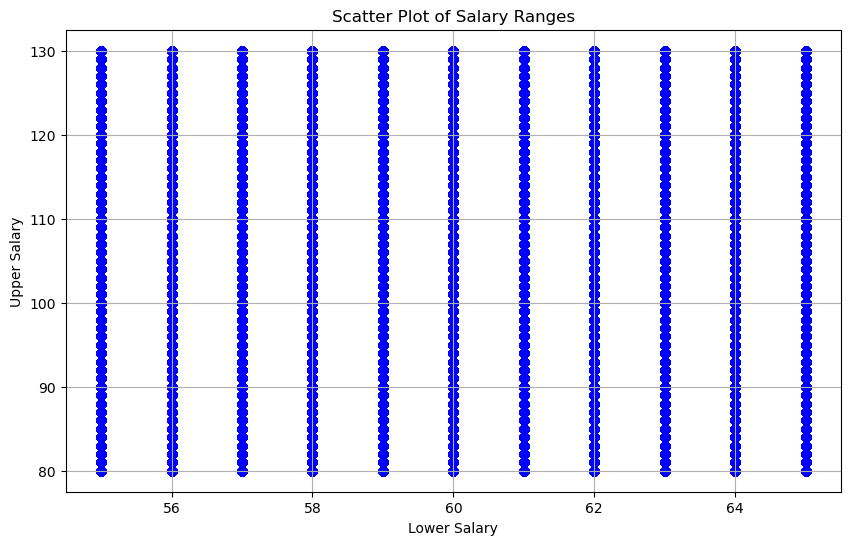

In [22]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
lower_salary = newdf['lower_salary']
upper_salary = newdf['upper_salary']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(lower_salary, upper_salary, color='blue', alpha=0.5)
plt.title('Scatter Plot of Salary Ranges')
plt.xlabel('Lower Salary')
plt.ylabel('Upper Salary')
plt.grid(True)
plt.show()

In [19]:
unique_values = df['Country'].unique()

In [21]:
# Define X and y
var = ['lower_experience', 'upper_experience', 'Qualifications_encoded', 'Work_Type_Encoded','Year_encoded', 'company_size_Small' ,'company_size_Medium',
       'company_size_Large','preference_Both', 'preference_Female', 'preference_Male']
X = newdf[var]
y = newdf['upper_salary']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# #Train a linear regression model. 
model.fit(X_train, y_train)

LinearRegression()

In [24]:
#Report and specify clearly the estimated coefficients and intercept.
coefficients = model.coef_
intercept = model.intercept_

#Hint: use print function to specify the result reported is the intercept.
print("coefficients:")
print("lower_experience:", coefficients[0])
print("upper_experience:", coefficients[1])
print("Qualifications_encoded:", coefficients[2])
print("Work_Type_Encoded:", coefficients[3])
print("Year_encoded:", coefficients[4])
print("company_size_Small:", coefficients[5])
print("company_size_Medium:", coefficients[6])
print("company_size_Large:", coefficients[7])
print("preference_Both:", coefficients[8])
print("preference_Female:", coefficients[9])
print("preference_Male:", coefficients[10])
print("intercept", intercept)

coefficients:
lower_experience: 0.015965168106550784
upper_experience: 0.004496102534770174
Qualifications_encoded: 0.0003314573905332796
Work_Type_Encoded: -0.0036717245105677143
Year_encoded: 0.005090309178294214
company_size_Small: 1816057849263.83
company_size_Medium: 1816057849263.854
company_size_Large: 1816057849263.85
preference_Both: 3918131206257.249
preference_Female: 3918131206257.25
preference_Male: 3918131206257.188
intercept -5734189055416.191


In [ ]:
train = model.score(X_train, y_train)
test = model.score(X_test, y_test)
print("R-squared value for training:", train)
print("R-squared value for test set:", test)

In [26]:
# load gridsearchCV
from sklearn.model_selection import GridSearchCV

# Load other modules
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [30]:
# Data Splitting, check sample
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 42)
print("done")

done


In [31]:
my_param_poly = {'polynomialfeatures__degree'  : [1, 2, 3] }
pipe_poly = PolynomialFeatures()
pipe_lr = LinearRegression()
poly_reg = make_pipeline(pipe_poly , pipe_lr)
# S3. Define GridSearchCV Estimation function, then train the model
grid_poly = GridSearchCV(poly_reg, my_param_poly, cv = 3)
grid_poly.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3]})

In [32]:
y_pred_grid_test = grid_poly.predict(X_test)

In [33]:
grid_poly.score(X_test, y_test)

-1.3118536581702145e-05

In [34]:
grid_poly.best_params_

{'polynomialfeatures__degree': 1}

In [35]:
grid_poly.best_score_

-2.7936422457131016e-05

In [36]:
grid_poly.best_estimator_.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=1),
 'linearregression': LinearRegression()}

In [37]:
from sklearn.linear_model import Ridge
ridge_base = Ridge(alpha = 1)
ridge_base.fit(X_train, y_train)
y_pred_test = ridge_base.predict(X_test)
print(ridge_base.score(X_test, y_test))
ridge_base.coef_, ridge_base.intercept_

-8.379751650133827e-06


(array([ 0.01336102,  0.00276904, -0.00031076,  0.00051008, -0.00282629,
         0.00318828,  0.00305939, -0.00624767, -0.00643448,  0.03627705,
        -0.02984256]),
 104.90663208376279)

In [38]:
## Grid Search with CV

# 1. Define a list of parameters (key is 'alpha')
ridge_params = { 'alpha' :  [0.001, 0.01, 0.1, 1, 10,100] }

# 2. Define function and fit the data
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, ridge_params, cv = 5)
ridge_grid.fit(X_train, y_train)

# 3.1 Present performance measure
## 3.1a: unbiased performance measure in R2
print(ridge_grid.score(X_test, y_test))
## 3.1b: performance measure based on which hyperparameter is chosen (R2)
print(ridge_grid.best_score_)
# 3.2 find best hyperparameters
print(ridge_grid.best_params_)
# 3.3 find best parameter estimates
# First get optimal model
ridge_grid.best_estimator_.coef_, ridge_grid.best_estimator_.intercept_

-8.37725468261219e-06
-1.631087756062133e-05
{'alpha': 100}


(array([ 0.01336063,  0.002769  , -0.00031076,  0.00051005, -0.00282576,
         0.00318724,  0.00305859, -0.00624583, -0.00643278,  0.03626751,
        -0.02983473]),
 104.90663311205954)

In [39]:
# Model and prediction with default hyperparameter
from sklearn.linear_model import Lasso

lasso_base = Lasso(alpha = 1)
lasso_base.fit(X_train, y_train)
y_pred_test = lasso_base.predict(X_test)
print(lasso_base.score(X_test, y_test))
lasso_base.coef_, lasso_base.intercept_

-5.506644359165591e-06


(array([ 0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.]),
 104.96852163888687)

In [40]:
# Grid Search with CV - LASSO Case

# 1. Define a list of parameters (key is 'alpha')
lasso_params = { 'alpha' :  [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10] }

# 2. Define function and fit the data
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, lasso_params, cv = 5)
lasso_grid.fit(X_train, y_train)
# 3.1 Present performance measure
## 3.1a: unbiased performance measure in R2
print(lasso_grid.score(X_test, y_test))
## 3.1b: performance measure based on which hyperparameter is chosen (R2)
print(lasso_grid.best_score_)
# 3.2 find best hyperparameters
print(lasso_grid.best_params_)
# 3.3 find best parameter estimates
# First get optimal model
lasso_grid.best_estimator_.coef_, lasso_grid.best_estimator_.intercept_

-5.506644359165591e-06
-1.3818167330814645e-06
{'alpha': 0.1}


(array([ 0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,  0., -0.]),
 104.96852163888687)

In [26]:
# Assuming 'data' is your DataFrame and 'column_name' is the name of the column
unique_values_count = df['Salary Range'].nunique()

print("Count of unique values:", unique_values_count)

Count of unique values: 561


In [21]:
unique_values = df['Salary Range'].unique()
print(unique_values)

['$59K-$99K' '$56K-$116K' '$61K-$104K' '$65K-$91K' '$64K-$87K' '$59K-$93K'
 '$63K-$103K' '$65K-$102K' '$60K-$80K' '$57K-$104K' '$64K-$98K'
 '$65K-$122K' '$56K-$86K' '$57K-$98K' '$65K-$100K' '$60K-$83K'
 '$55K-$117K' '$55K-$121K' '$65K-$128K' '$62K-$120K' '$58K-$116K'
 '$62K-$124K' '$60K-$104K' '$58K-$107K' '$59K-$88K' '$64K-$100K'
 '$63K-$86K' '$65K-$119K' '$55K-$83K' '$65K-$115K' '$57K-$121K'
 '$65K-$82K' '$62K-$130K' '$58K-$129K' '$60K-$89K' '$64K-$103K'
 '$57K-$100K' '$58K-$81K' '$56K-$109K' '$62K-$129K' '$65K-$95K'
 '$56K-$82K' '$59K-$80K' '$64K-$130K' '$59K-$89K' '$57K-$97K' '$62K-$127K'
 '$55K-$105K' '$59K-$123K' '$59K-$114K' '$64K-$92K' '$60K-$102K'
 '$63K-$109K' '$57K-$125K' '$65K-$88K' '$65K-$117K' '$61K-$111K'
 '$56K-$94K' '$65K-$121K' '$65K-$84K' '$55K-$96K' '$59K-$101K'
 '$63K-$114K' '$64K-$82K' '$56K-$125K' '$64K-$83K' '$58K-$88K'
 '$56K-$128K' '$60K-$113K' '$55K-$87K' '$56K-$101K' '$63K-$102K'
 '$61K-$105K' '$56K-$93K' '$65K-$96K' '$57K-$83K' '$63K-$104K'
 '$59K-$113K' '$

In [33]:
# Assuming 'df' is your DataFrame and 'upper_salary' is the column with upper salary values
# Replace 'upper_salary' with the actual column name in your DataFrame

# Find the minimum and maximum values of the 'upper_salary' column
min_salary = newdf['upper_salary'].min()
max_salary = newdf['upper_salary'].max()
min_salaryL = newdf['lower_salary'].min()
max_salaryL = newdf['lower_salary'].max()

# Display the results
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Minimum SalaryL: {min_salaryL}")
print(f"Maximum SalaryL: {max_salaryL}")

Minimum Salary: 80.0
Maximum Salary: 130.0
Minimum SalaryL: 55.0
Maximum SalaryL: 65.0


In [19]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'upper_salary' is the column with upper salary values
# Replace 'upper_salary' with the actual column name in your DataFrame

# Define the bins and labels for categorization
bins = [80, 90, 100, 120, 130]  # Adjust the bin edges as needed
labels = ['80K-89K', '90K-99K', '100K-119K', '120K-129K']

# Create a new column 'salary_category' based on the upper_salary column
df['salary_category'] = pd.cut(df['upper_salary'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with new categories
print(df[['upper_salary', 'salary_category']])

         upper_salary salary_category
0                99.0         90K-99K
1               116.0       100K-119K
2               104.0       100K-119K
3                91.0         90K-99K
4                87.0         80K-89K
...               ...             ...
1615935         114.0       100K-119K
1615936         130.0       120K-129K
1615937          96.0         90K-99K
1615938         103.0       100K-119K
1615939         109.0       100K-119K

[1615940 rows x 2 columns]


In [20]:
unique_values = df['salary_category'].unique()
print(unique_values)

['90K-99K', '100K-119K', '80K-89K', '120K-129K']
Categories (4, object): ['80K-89K' < '90K-99K' < '100K-119K' < '120K-129K']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

features = newdf[['lower_experience', 'upper_experience', 'Qualifications_encoded', 'Work_Type_Encoded','Year_encoded', 'company_size_Small' ,'company_size_Medium',
       'company_size_Large','preference_Both', 'preference_Female', 'preference_Male']]  # Add your relevant features here

# Target variable (dependent variable)
target = df['salary_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize a RandomForestClassifier (you can choose a different classifier based on your needs)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the test set
predictions = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'newdf' and 'df' are your DataFrames
features = newdf[['lower_experience', 'upper_experience', 'Qualifications_encoded', 'Work_Type_Encoded',
                   'Year_encoded', 'company_size_Small', 'company_size_Medium', 'company_size_Large',
                   'preference_Both', 'preference_Female', 'preference_Male']]

# Target variable (dependent variable)
target = df['salary_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize a RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test set with the best model
best_classifier = grid_search.best_estimator_
predictions = best_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
classification_report_result = classification_report(y_test, predictions)

# Display results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_result)
